In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load and merge csv files
- restaurantList.csv contains basic information of each restaurant
- revie_data.csv contains detailed review data
- These two files are merged based on unique restaurant id

In [3]:
# restaurant data
df_restaurant = pd.read_csv("restaurantList.csv")
# review data
df_review = pd.read_csv("./review_data.csv")

In [4]:
# merge based on id
df = pd.merge(df_restaurant, df_review, on="id")
# add review counts
rc = pd.DataFrame(df["id"].value_counts()).reset_index()
rc = rc.rename(columns={"index":"id", "id":"reviewCount"})
df = pd.merge(df, rc, on="id")

# Filtering

Filter restaurants with the following conditions:
- with more than 50 reviews
- "Swiss" is included in the top 2 genres

In [21]:
# bool list for filtering
min_reviewCount = 50
filter_list = (df["reviewCount"]>=min_reviewCount) & ((df["genre1"]=="Swiss") | (df["genre2"]=="Swiss"))
# make filtered dataframe
df_filtered = df[filter_list]
print("Number of restaurants:", df_filtered["id"].nunique())
print("Number of reviews:", df_filtered.drop_duplicates(subset=["id"])["reviewCount"].sum())

Number of restaurants: 73
Number of reviews: 15385


# Preprocessing

- Delete newline tag ("\n")
- Add feature of words count

In [23]:
# delete "\n"
df_filtered["content"] = df_filtered["content"].apply(lambda x: x.replace("\n",""))

C:\Users\kmkmk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# word count
df_filtered["words"] = df_filtered["content"].apply(lambda x: len(x.split()))

C:\Users\kmkmk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Save the dataset

In [25]:
# output
df_filtered.to_csv("dataset.csv", index=False)

# Check review counts

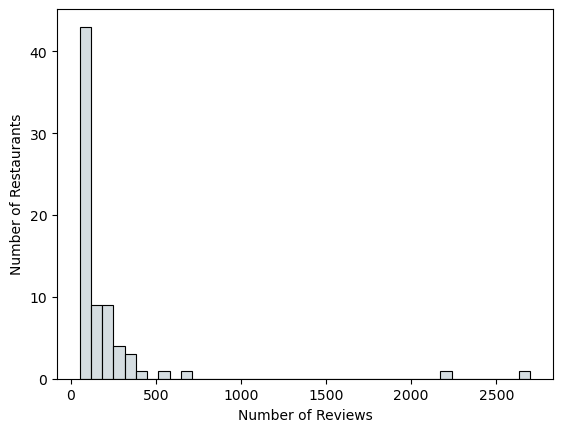

In [5]:
df = pd.read_csv("dataset.csv")
res = df.drop_duplicates(subset=["id"])
p = sns.histplot(
    data = res,
    x = "reviewCount",
    color="#C8D2D7"
)
p.set(xlabel="Number of Reviews", ylabel = "Number of Restaurants")
plt.savefig("figures/distr_number_of_reviews.pdf")
plt.show()